<img src= "https://raw.githubusercontent.com/e-sensing/sits/master/inst/extdata/sticker/sits_sticker.png" align="left" width="64"/>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span align="center" style="color:#336699" >Working with time series in <b>sits</b></span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Souza<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: August 31, 2022
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract</b><br>
<b>sits</b> is an open-source R package for satellite image time series analysis. The package supports the application of machine learning techniques for classification image time series obtained from data cubes. This Jupyter Notebook shows how to work with time series in <b>sits</b>. This notebook corresponds to the chapter "Working with Time Series" in the <a href="https://e-sensing.github.io/sitsbook/" target="_blank"> book on the SITS package</a>.
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 100%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For a comprehensive sits overview and discussion, please, refer to the online book:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Simoes, R; Camara, G.; Souza, F.; Santos, L.; Andrade, P.; Carvalho, A.; Pelletier, C.; Ferreira, K.; Queiroz, G. <a href="https://e-sensing.github.io/sitsbook/" target="_blank">sits: Satellite Image Time Series</a>.
    </div>
</div>

## Setup
<hr style="border:1px solid #0077b9;">

To prepare `sits` for this session in Kaggle, use the following command:

In [1]:
#
# install packages on-the-fly
#
system("cp -u -R ../input/sits-bundle/sits-bundle/* /usr/local/lib/R/site-library/")

In [2]:
# load sits
library(sits)
library(sitsdata)

SITS - satellite image time series analysis.

Loaded sits v1.3.0.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.

Loaded sitsdata data sets v0.4.4. Use citation("sitsdata") for use in publication.



## Data structures for satellite time series
<hr style="border:1px solid #0077b9;">

In [3]:
# samples
data("samples_matogrosso_mod13q1")
print(samples_matogrosso_mod13q1[1:4, ])

# A tibble: 4 × 7
  longitude latitude start_date end_date   label   cube     time_series      
      <dbl>    <dbl> <date>     <date>     <chr>   <chr>    <list>           
1     -57.8    -9.76 2006-09-14 2007-08-29 Pasture bdc_cube <tibble [23 × 5]>
2     -59.4    -9.31 2014-09-14 2015-08-29 Pasture bdc_cube <tibble [23 × 5]>
3     -59.4    -9.31 2013-09-14 2014-08-29 Pasture bdc_cube <tibble [23 × 5]>
4     -57.8    -9.76 2006-09-14 2007-08-29 Pasture bdc_cube <tibble [23 × 5]>


## Utilities for handling time series
<hr style="border:1px solid #0077b9;">

In [4]:
sits_labels_summary(samples_matogrosso_mod13q1)

label,count,prop
<chr>,<int>,<dbl>
Cerrado,379,0.20031712
Fallow_Cotton,29,0.01532770
Forest,131,0.06923890
Pasture,344,0.18181818
Soy_Corn,364,0.19238901
Soy_Cotton,352,0.18604651
Soy_Fallow,87,0.04598309
Soy_Millet,180,0.09513742
Soy_Sunflower,26,0.01374207


In [5]:
# copy the sample set for Mato Grosso
samples_new_labels <- samples_matogrosso_mod13q1

sits_labels(samples_new_labels) <- c(
  "Cerrado", "Croplands", "Forest", "Pasture", "Croplands", 
  "Croplands", "Croplands", "Croplands", "Croplands"
)

sits_labels_summary(samples_new_labels)

label,count,prop
<chr>,<int>,<dbl>
Cerrado,379,0.2003171
Croplands,1038,0.5486258
Forest,131,0.0692389
Pasture,344,0.1818182


In [6]:
# select NDVI band
samples_ndvi <- sits_select(samples_matogrosso_mod13q1, bands = "NDVI")

# select only samples with Cerrado label
samples_cerrado <- dplyr::filter(samples_ndvi, label == "Cerrado")

## Time series visualisation
<hr style="border:1px solid #0077b9;">

In [7]:
# configure graphs output
options(repr.plot.width = 10, repr.plot.height = 5)

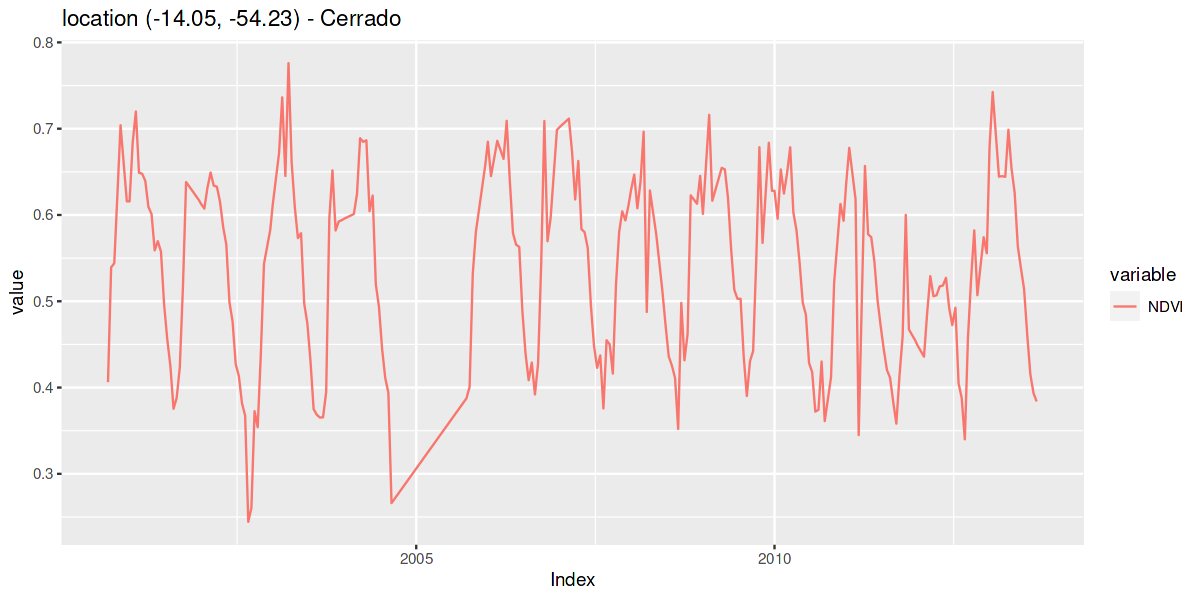

In [8]:
# plot the first 12 samples
plot(samples_cerrado[1:12, ])

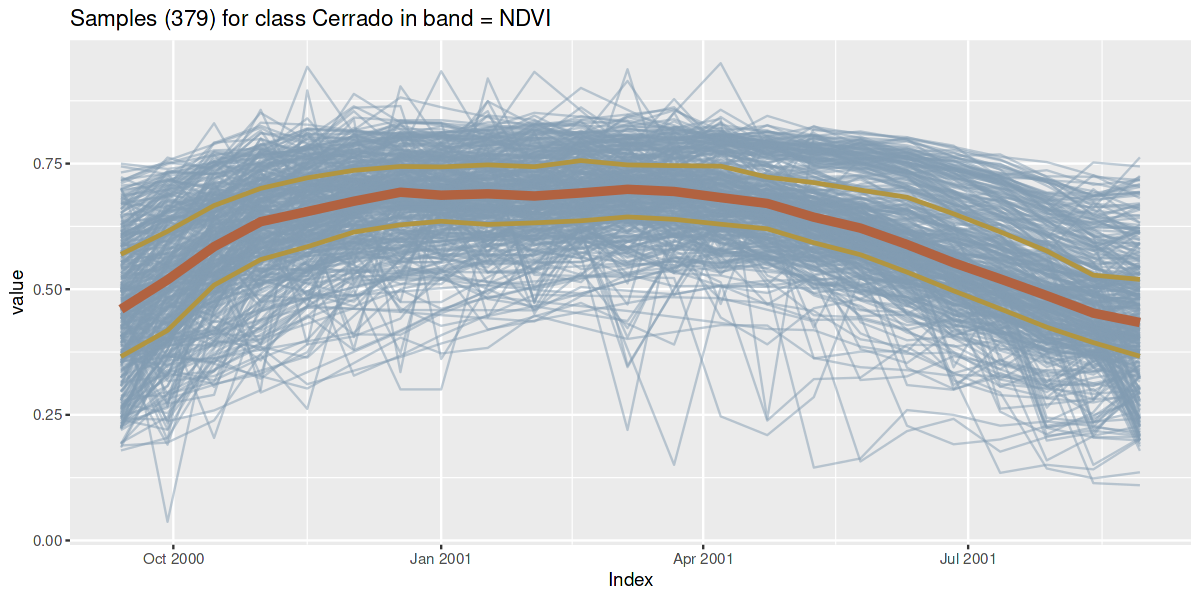

In [9]:
# plot all cerrado samples together
plot(samples_cerrado)

## Obtaining time series data from data cubes
<hr style="border:1px solid #0077b9;">


  |======================================================================| 100%


All points have been retrieved



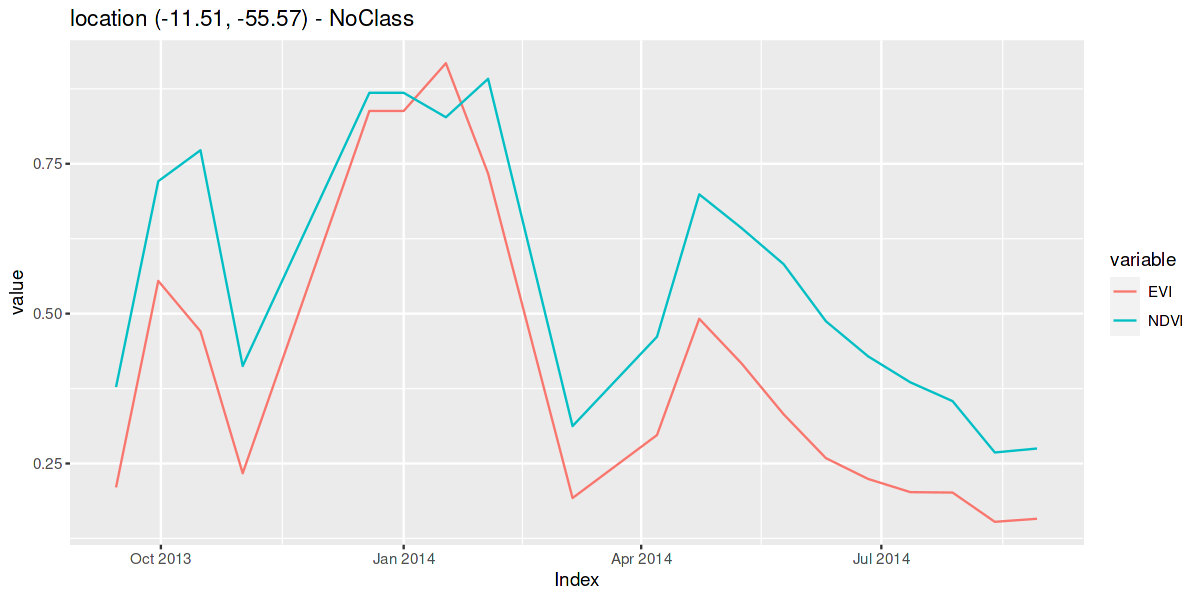

In [10]:
# Obtain a raster cube with based on local files
data_dir <- system.file("extdata/sinop", package = "sitsdata")
raster_cube <- sits_cube(
  source     = "BDC",
  collection = "MOD13Q1-6",
  data_dir   = data_dir,
  parse_info = c("X1", "X2", "tile", "band", "date")
)

# obtain a time series from the raster cube from a point
sample_latlong <- tibble::tibble(longitude = -55.57320, latitude  = -11.50566)

series <- sits_get_data(
  cube    = raster_cube,
  samples = sample_latlong
)

plot(series)

In [11]:
# retrieve a list of samples described by a CSV file
samples_csv_file <- system.file("extdata/samples/samples_sinop_crop.csv", package = "sits")

# for demonstration, read the CSV file into an R object
samples_csv <- read.csv(samples_csv_file)

# print the first three lines
samples_csv[1:3, ]

,id,longitude,latitude,start_date,end_date,label
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,-55.65931,-11.76267,2013-09-14,2014-08-29,Pasture
2,2,-55.64833,-11.76385,2013-09-14,2014-08-29,Pasture
3,3,-55.66738,-11.78032,2013-09-14,2014-08-29,Forest


In [12]:
# get the points from a data cube in raster brick format
points <- sits_get_data(
  cube    = raster_cube,
  samples = samples_csv_file
)

# show the tibble with the first three points
print(points[1:3, ])

All points have been retrieved



# A tibble: 3 × 7
  longitude latitude start_date end_date   label    cube      time_series      
      <dbl>    <dbl> <date>     <date>     <chr>    <chr>     <list>           
1     -55.8    -11.7 2013-09-14 2014-08-29 Cerrado  MOD13Q1-6 <tibble [23 × 3]>
2     -55.8    -11.7 2013-09-14 2014-08-29 Cerrado  MOD13Q1-6 <tibble [23 × 3]>
3     -55.7    -11.7 2013-09-14 2014-08-29 Soy_Corn MOD13Q1-6 <tibble [23 × 3]>


In [13]:
# obtain a set of points inside the state of Mato Grosso, Brazil
shp_file <- system.file("extdata/shapefiles/mato_grosso/mt.shp", package = "sits")

# read the shapefile into an "sf" object
sf_shape <- sf::st_read(shp_file)

Reading layer `mt' from data source 
  `/usr/local/lib/R/site-library/sits/extdata/shapefiles/mato_grosso/mt.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -61.63284 ymin: -18.03993 xmax: -50.22481 ymax: -7.349034
Geodetic CRS:  SIRGAS 2000


In [14]:
# To access the Brazil Data Cube, users need to provide 
# their credentials using an environment variables, as 
# shown below. Obtaining a BDC access key is free. 
# Users need to register at the BDC site to obtain the key.
Sys.setenv("BDC_ACCESS_KEY" = "change-me")

In [15]:
# create a data cube based on MOD13Q1 collection from BDC
modis_cube <- sits_cube(
  source      = "BDC",
  collection  = "MOD13Q1-6",
  bands       = c("NDVI", "EVI"),
  roi         = sf_shape,
  start_date  = "2020-06-01",
  end_date    = "2021-08-29"
)

# read the points from the cube and produce a tibble with time series
samples_mt <- sits_get_data(
  cube       = modis_cube,
  samples    = shp_file,
  start_date = "2020-06-01", 
  end_date   = "2021-08-29",
  n_sam_pol  = 20, 
  multicores = 4
)

  |======================================================================| 100%


All points have been retrieved



## Filtering techniques for time series
<hr style="border:1px solid #0077b9;">

### Savitzky–Golay filter

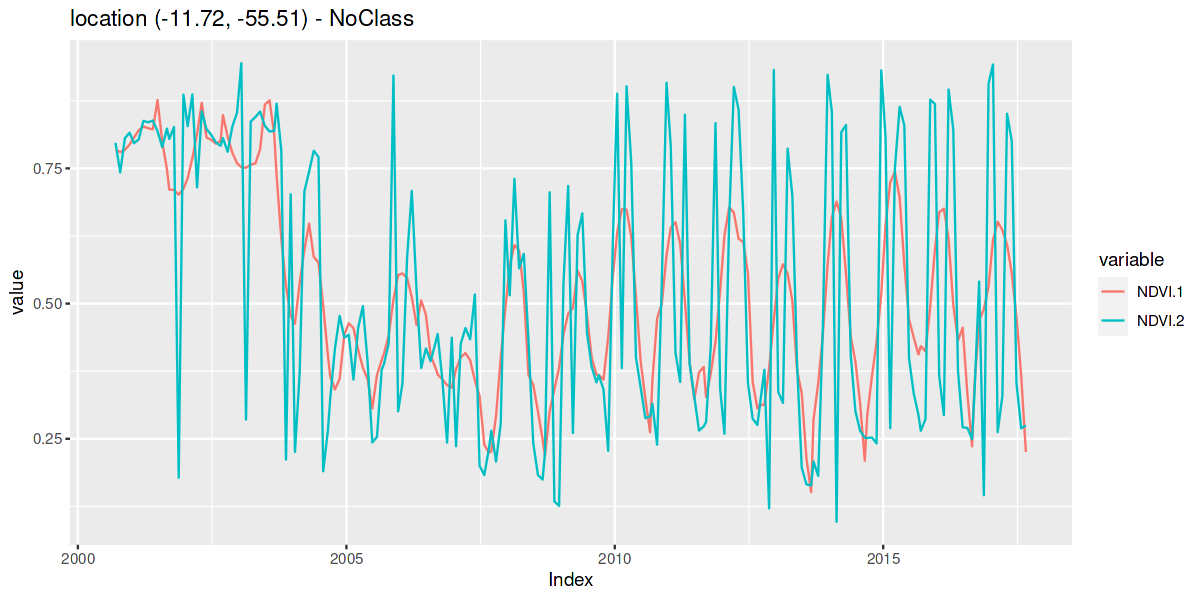

In [16]:
# Take NDVI band of the first sample data set
point_ndvi <- sits_select(point_mt_6bands, band = "NDVI")

# apply Savitzky Golay filter
point_sg <- sits_sgolay(point_ndvi, length = 11)

# merge the point and plot the series
sits_merge(point_sg, point_ndvi) %>% plot()

### Whittaker filter

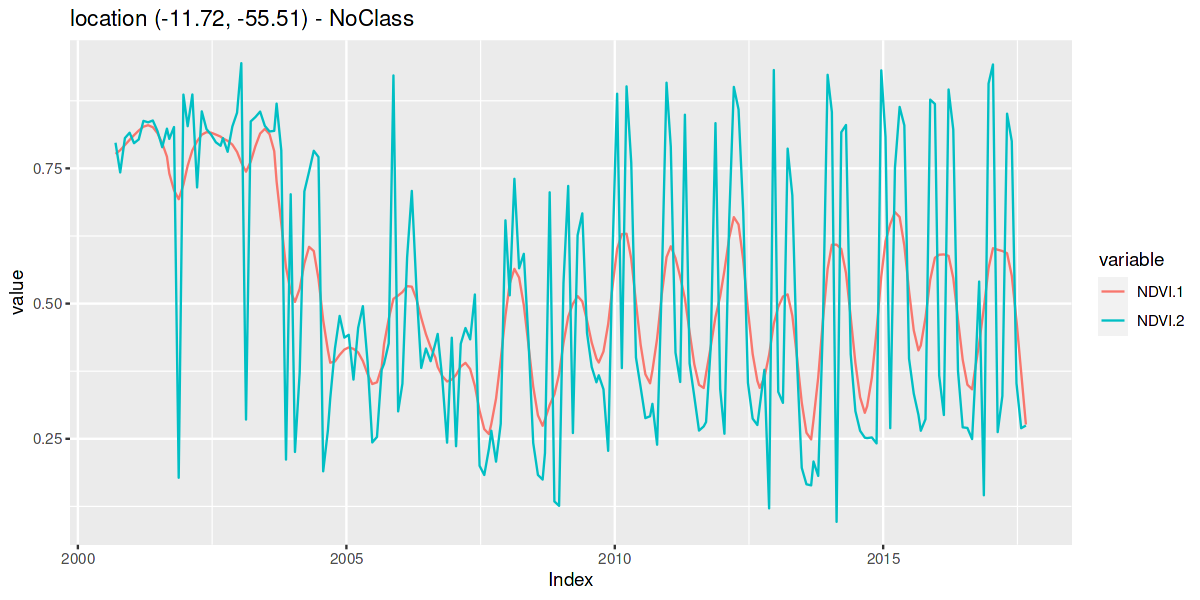

In [17]:
# Take NDVI band of the first sample data set
point_ndvi <- sits_select(point_mt_6bands, band = "NDVI")

# apply Whitakker filter
point_whit <- sits_whittaker(point_ndvi, lambda = 8)

# merge the point and plot the series
sits_merge(point_whit, point_ndvi) %>% plot()